In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import a0
from math import pi, e

[1. 0. 0. ... 0. 0. 0.]


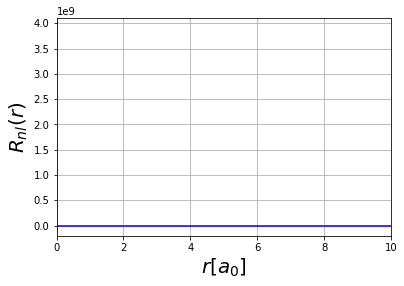

In [21]:
def R(r):
    v = -r/a0.value
    v = e**v
    return (r**4*e**v)

def rmax(n,l):
    return n**2*(1+0.5*(1-l*(l+1)/n**2))

r = np.linspace(0,250,10000)
print(e**(-r/a0.value))
P = R(r)

plt.xlim([0, 2*rmax(2,1)])
plt.plot(r, P, "b")
plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')